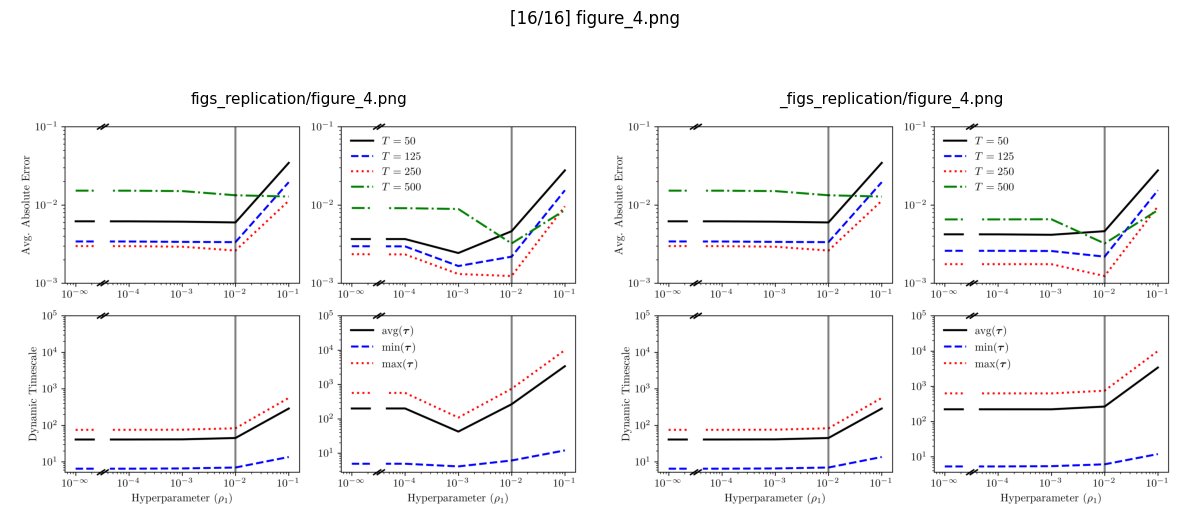

Done.


In [2]:
# Side-by-side PNG comparator: ./figs_replication vs ./_figs_replication
from pathlib import Path
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

DIR_LEFT  = Path("./figs_replication")
DIR_RIGHT = Path("./_figs_replication")
RECURSIVE = False            # set True if you want to mirror subfolders under ./fig
SHUFFLE   = False            # set True to randomize order
STRICT    = False            # if True, raise on missing counterpart; if False, skip and warn

def collect_pairs(dir_left: Path, dir_right: Path, recursive: bool = False):
    left_paths = (dir_left.rglob("*.png") if recursive else dir_left.glob("*.png"))
    left_paths = sorted(left_paths, key=lambda p: str(p).lower())
    pairs = []
    missing = []
    for lp in left_paths:
        rel = lp.relative_to(dir_left) if recursive else lp.name
        rp = (dir_right / rel) if recursive else (dir_right / lp.name)
        if rp.exists():
            pairs.append((lp, rp))
        else:
            missing.append(lp)
    return pairs, missing

pairs, missing = collect_pairs(DIR_LEFT, DIR_RIGHT, RECURSIVE)

if SHUFFLE:
    import random
    random.shuffle(pairs)

print(f"Found {len(pairs)} matched pair(s). Missing counterparts for {len(missing)} file(s).")
if missing:
    print("Missing on right (_file):")
    for m in missing[:10]:
        print(" -", m)
    if len(missing) > 10:
        print(f" ... (+{len(missing)-10} more)")
    if STRICT and missing:
        raise FileNotFoundError("Counterparts missing; enable STRICT=False to skip.")

for i, (left, right) in enumerate(pairs, 1):
    clear_output(wait=True)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(mpimg.imread(left))
    axs[0].axis("off")
    axs[0].set_title(f"figs_replication/{left.name}", fontsize=11)

    axs[1].imshow(mpimg.imread(right))
    axs[1].axis("off")
    axs[1].set_title(f"_figs_replication/{right.name}", fontsize=11)

    fig.suptitle(f"[{i}/{len(pairs)}] {left.name}", fontsize=12)
    fig.tight_layout()
    display(fig)
    plt.close(fig)

    cmd = input("Enter=next, 'q'+Enter=quit: ").strip().lower()
    if cmd == "q":
        print("Stopped by user.")
        break
else:
    print("Done.")
